# Notebook Overview

This notebook analyzes changes in ocean volume under different climate scenarios (SSP585 and SSP370) for various climate models (CAMS-CSM1-0, CESM2, CNRM-ESM2-1, GFDL-ESM4, IPSL-CM6A-LR, MIROC6).

It performs the following steps:
1.  **Imports Libraries**: Essential Python libraries for data manipulation, oceanographic calculations, and plotting are imported.
2.  **`Univ_Diagram` Function**: A function is defined to process oceanographic data from parquet files. This function calculates and grids differences in Conservative Temperature and Absolute Salinity, along with scaled ocean volume, using `pygmt.surface`.
3.  **Scenario Analysis (SSP585 & SSP370)**: For each climate model and scenario, the notebook:
    *   Loads historical and scenario-specific data.
    *   Uses the `Univ_Diagram` function to generate gridded datasets.
    *   Calculates the difference in ocean volume between the historical and scenario data.
    *   Generates a Taylor Diagram plot showing the difference in ocean volume, including contours for potential density anomaly (`sigma_theta`).
    *   Saves the generated plot as a PNG image.

In [ ]:
# Imports all necessary Python libraries.
import pygmt
import gsw
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

In [ ]:
# Defines a function to process oceanographic data and create gridded datasets.
def Univ_Diagram(file_1, file_2):

    # DataFrame with a 0.2 interval for Conservative Temperature (°C) and 0.02 for Absolute Salinity (g/kg)
    # Depth according to the folder path

    # Grid 1
    df = pd.read_parquet(file_1);

    # Divide the volume
    df.vol = df.vol/1e13;

    # Removes these minimum values that I defined, so as not to hinder the correct surface creation by pygmt. These values are due to the creation of a midpoint for the intervals, but since they were minimum points and the left interval is not included, pandas creates an interval like (-2, -1.98], it will be (-2.00001, -1.98] making the average -1.9005, which can hinder the correct grid creation by pygmt
    df = df.loc[(df.thetao > -1.9005) & (df.so > 33.0095)];

    # Selects the region, it is important that it has the same minimum and maximum values as my dataframe.
    region = [-1.7, 19.9, 33.03, 36.99];

    grid = pygmt.surface(
        x=df.thetao,
        y=df.so,
        z=df.vol,
        spacing="0.2/0.02",
        region=region,  # xmin, xmax, ymin, ymax
        T=0.50,
        Ll=0,
    );

    # Grid 2
    df = pd.read_parquet(file_2);

    df.vol = df.vol/1e13;

    df = df.loc[(df.thetao > -1.9005) & (df.so > 33.0095)];

    grid2 = pygmt.surface(
        x=df.thetao,
        y=df.so,
        z=df.vol,
        spacing="0.2/0.02",
        region=region,  # xmin, xmax, ymin, ymax
        T=0.50,
        Ll=0,
    );

    grid = grid.rename({"y":"so", "x" : "thetao"});
    grid2 = grid2.rename({"y":"so", "x" : "thetao"});

    return grid, grid2

# Plotagens SSP585

## CAMS-CSM1-0

C:\Users\gabri\AppData\Local\Temp\ipykernel_16712\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_16712\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_16712\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_16712\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


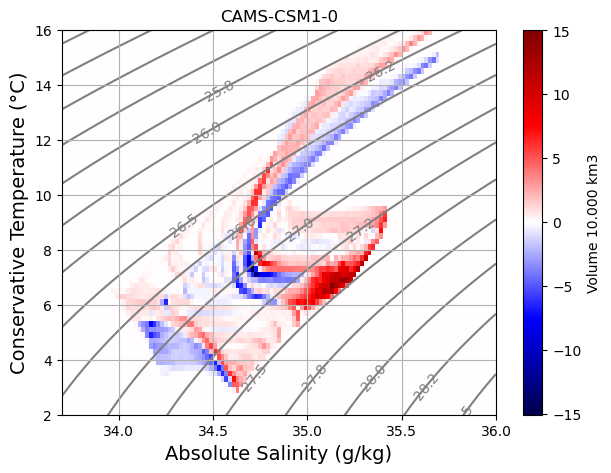

In [ ]:
# This cell plots the difference in ocean volume for CAMS-CSM1-0 under the SSP585 scenario.
file_1 = "Dataframes_50S_20S/CMIP.CAMS.CAMS-CSM1-0.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.CAMS.CAMS-CSM1-0.ssp585.parquet"
x_t1, x_t2, x_s1, x_s2 = 2, 16, 33.7, 36
grid, grid2 = Univ_Diagram(file_1, file_2)
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("CAMS-CSM1-0")
plt.savefig("Imagens_50S_20S/CAMS-CSM1-0_ssp585.png")
plt.show()

## CESM2

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


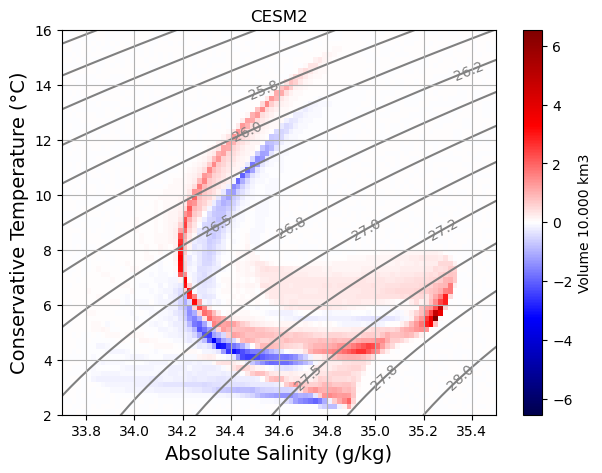

In [ ]:
# This cell plots the difference in ocean volume for CESM2 under the SSP585 scenario.
file_1 = "Dataframes_50S_20S/CMIP.NCAR.CESM2.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.NCAR.CESM2.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 33.7, 35.5
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("CESM2")
plt.savefig("Imagens_50S_20S/CESM2_ssp585.png")
plt.show()

## CNRM

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


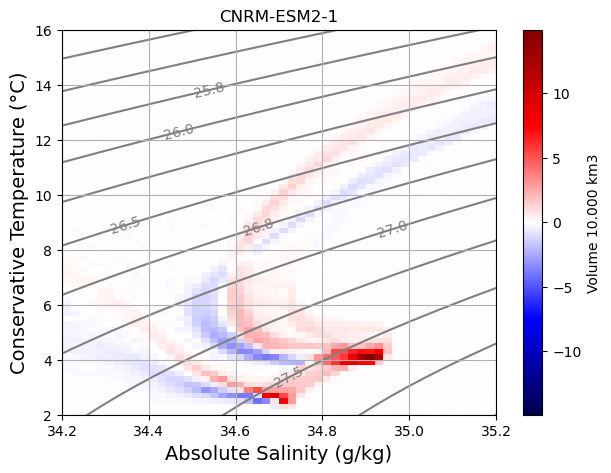

In [ ]:
# This cell plots the difference in ocean volume for CNRM-ESM2-1 under the SSP585 scenario.
file_1 = "Dataframes_50S_20S/CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 34.2, 35.2
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("CNRM-ESM2-1")
plt.savefig("Imagens_50S_20S/CNRM-ESM2-1_ssp585.png")
plt.show()

## GFDL-ESM4

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


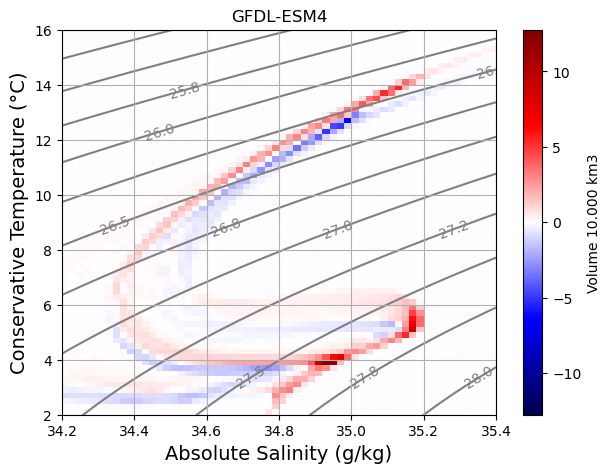

In [ ]:
# This cell plots the difference in ocean volume for GFDL-ESM4 under the SSP585 scenario.
file_1 = "Dataframes_50S_20S/CMIP.NOAA-GFDL.GFDL-ESM4.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 34.2, 35.4
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("GFDL-ESM4")
plt.savefig("Imagens_50S_20S/GFDL-ESM4_ssp585.png")
plt.show()

## IPSL-CM6A-LR

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


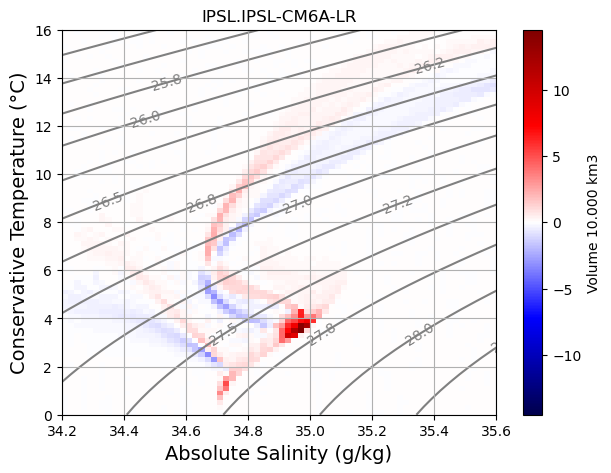

In [ ]:
# This cell plots the difference in ocean volume for IPSL-CM6A-LR under the SSP585 scenario.
file_1 = "Dataframes_50S_20S/CMIP.IPSL.IPSL-CM6A-LR.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 0, 16, 34.2, 35.6
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("IPSL.IPSL-CM6A-LR")
plt.savefig("Imagens_50S_20S/IPSL.IPSL-CM6A-LR_ssp585.png")
plt.show()

## MIROC6

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


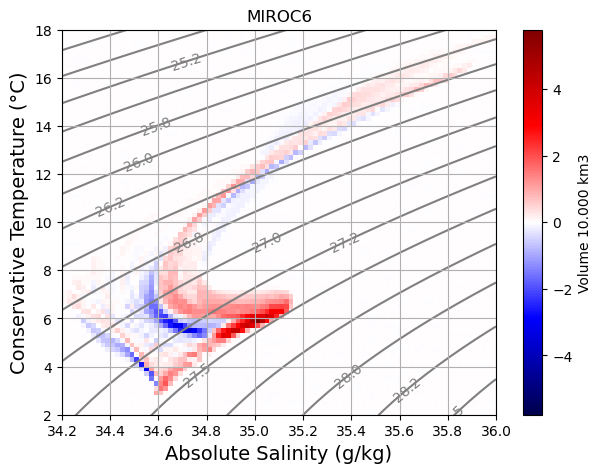

In [ ]:
# This cell plots the difference in ocean volume for MIROC6 under the SSP585 scenario.
file_1 = "Dataframes_50S_20S/CMIP.MIROC.MIROC6.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.MIROC.MIROC6.ssp585.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 18, 34.2, 36
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 18)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("MIROC6")
plt.savefig("Imagens_50S_20S/MIROC6_ssp585.png")
plt.show()

# Plotagens SSP370

## CAMS-CSM1-0

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


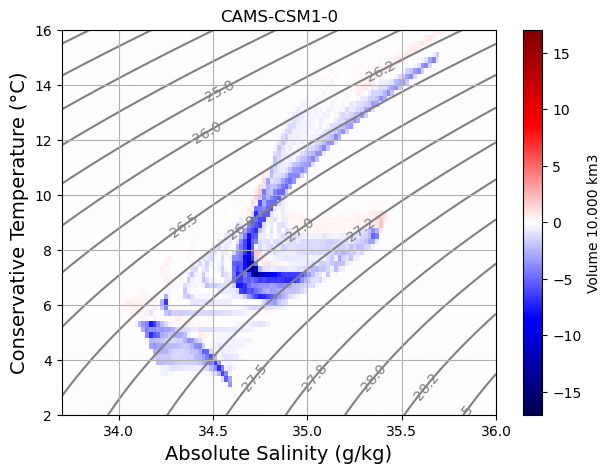

In [ ]:
# This cell plots the difference in ocean volume for CAMS-CSM1-0 under the SSP370 scenario.
file_1 = "Dataframes_50S_20S/CMIP.CAMS.CAMS-CSM1-0.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.CAMS.CAMS-CSM1-0.ssp370.parquet"
x_t1, x_t2, x_s1, x_s2 = 2, 16, 33.7, 36
grid, grid2 = Univ_Diagram(file_1, file_2)
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("CAMS-CSM1-0")
plt.savefig("Imagens_50S_20S/CAMS-CSM1-0_ssp370.png")
plt.show()

## CESM2

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


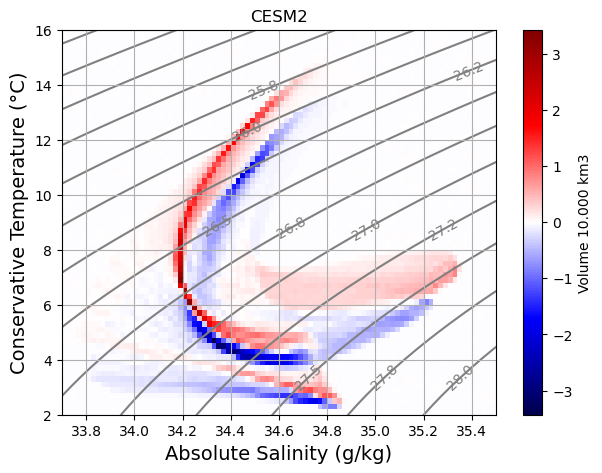

In [ ]:
# This cell plots the difference in ocean volume for CESM2 under the SSP370 scenario.
file_1 = "Dataframes_50S_20S/CMIP.NCAR.CESM2.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.NCAR.CESM2.ssp370.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 33.7, 35.5
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("CESM2")
plt.savefig("Imagens_50S_20S/CESM2_ssp370.png")
plt.show()

## CNRM

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


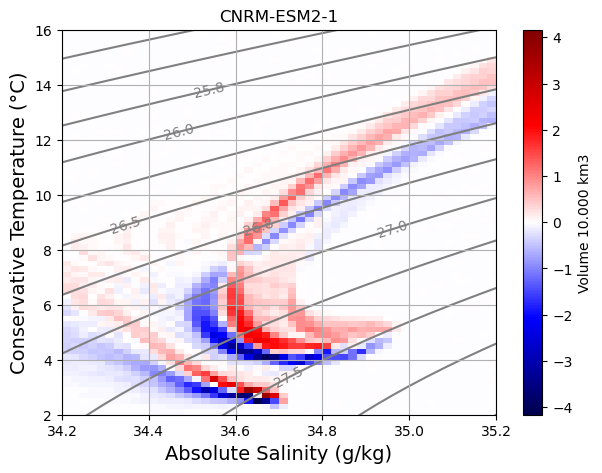

In [ ]:
# This cell plots the difference in ocean volume for CNRM-ESM2-1 under the SSP370 scenario.
file_1 = "Dataframes_50S_20S/CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp370.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 34.2, 35.2
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("CNRM-ESM2-1")
plt.savefig("Imagens_50S_20S/CNRM-ESM2-1_ssp370.png")
plt.show()

## GFDL-ESM4

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


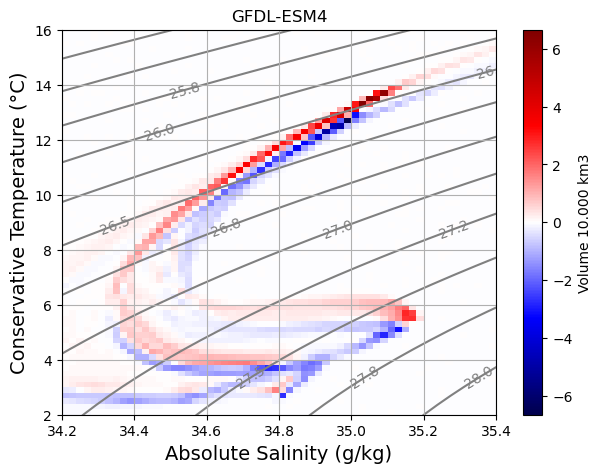

In [ ]:
# This cell plots the difference in ocean volume for GFDL-ESM4 under the SSP370 scenario.
file_1 = "Dataframes_50S_20S/CMIP.NOAA-GFDL.GFDL-ESM4.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp370.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 16, 34.2, 35.4
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("GFDL-ESM4")
plt.savefig("Imagens_50S_20S/GFDL-ESM4_ssp370.png")
plt.show()

## IPSL-CM6A-LR

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


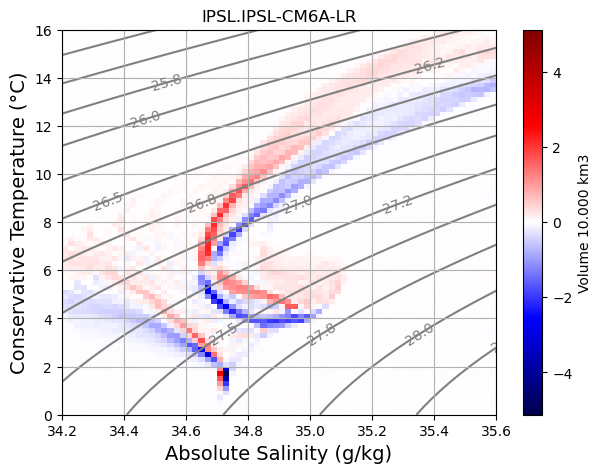

In [ ]:
# This cell plots the difference in ocean volume for IPSL-CM6A-LR under the SSP370 scenario.
file_1 = "Dataframes_50S_20S/CMIP.IPSL.IPSL-CM6A-LR.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp370.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 0, 16, 34.2, 35.6
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 16.5)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("IPSL.IPSL-CM6A-LR")
plt.savefig("Imagens_50S_20S/IPSL.IPSL-CM6A-LR_ssp370.png")
plt.show()

## MIROC6

C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:18: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (Ll) is not recommended. Use long-form parameter 'lower' instead.
  grid2 = pygmt.surface(
C:\Users\gabri\AppData\Local\Temp\ipykernel_51404\863004886.py:35: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid2 = pygmt.surface(


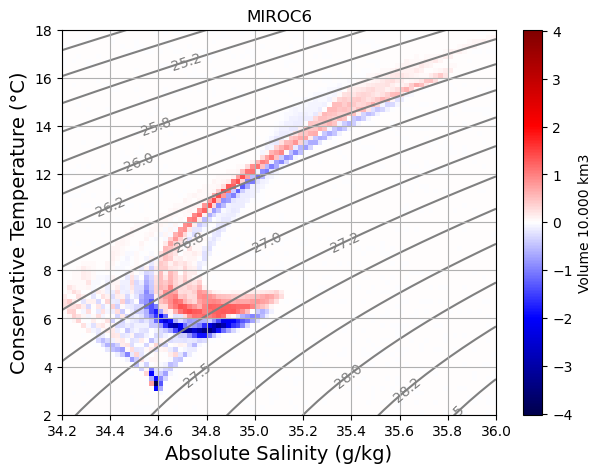

In [ ]:
# This cell plots the difference in ocean volume for MIROC6 under the SSP370 scenario.
file_1 = "Dataframes_50S_20S/CMIP.MIROC.MIROC6.historical.parquet"
file_2 = "Dataframes_50S_20S/ScenarioMIP.MIROC.MIROC6.ssp370.parquet"
grid, grid2 = Univ_Diagram(file_1, file_2)
x_t1, x_t2, x_s1, x_s2 = 2, 18, 34.2, 36
diff = (grid2 - grid)
import gsw
fig, ax = plt.subplots(figsize=(7, 5))
diff.attrs['long_name'] = 'Volume 10.000 km3'
p = diff.plot(x='so', y='thetao', cmap="seismic")
plt.xlim(x_s1, x_s2)
plt.ylim(x_t1, x_t2)

tempL = np.linspace(0, 18)
salL = np.linspace(33, 36)

Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1, levels=20)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
plt.grid(True)
plt.xlabel('Absolute Salinity (g/kg)', fontsize=14)
plt.ylabel('Conservative Temperature (°C)', fontsize=14)
plt.title("MIROC6")
plt.savefig("Imagens_50S_20S/MIROC6_ssp370.png")
plt.show()

In [ ]:
# This is an empty code cell.